In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/halilovm/Desktop/ARX_DISTRIBUTED_RESULTS/result_memory.csv', sep=";")

#df = pd.read_csv('result_memory.csv', sep=";")
print(df)

    Dataset               Config  Local  Sorted  Threads  Granularity  \
0      ihis          5-anonymity  False    True        1     0.862410   
1      ihis          5-anonymity   True    True        1     0.967787   
2      ihis          5-anonymity  False    True        2     0.793442   
3      ihis          5-anonymity   True    True        2     0.962367   
4      ihis          5-anonymity  False    True        3     0.825430   
..      ...                  ...    ...     ...      ...          ...   
827    ihis  0.2-equal-closeness   True    True       30     0.622369   
828    ihis  0.2-equal-closeness  False    True       31     0.591346   
829    ihis  0.2-equal-closeness   True    True       31     0.628178   
830    ihis  0.2-equal-closeness  False    True       32     0.591823   
831    ihis  0.2-equal-closeness   True    True       32     0.624233   

        Memory  
0    341587832  
1    455778760  
2    343384600  
3    431593336  
4    356384568  
..         ...  
827 

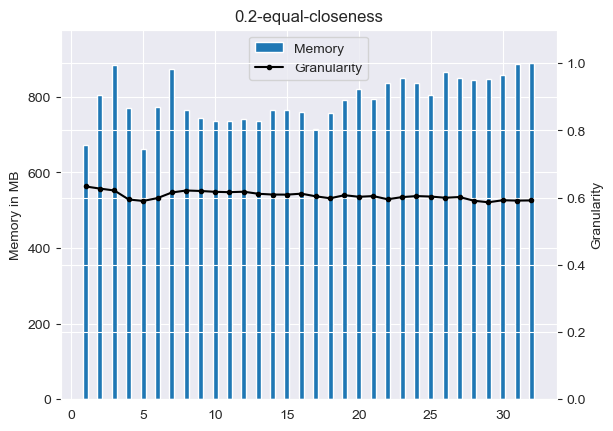

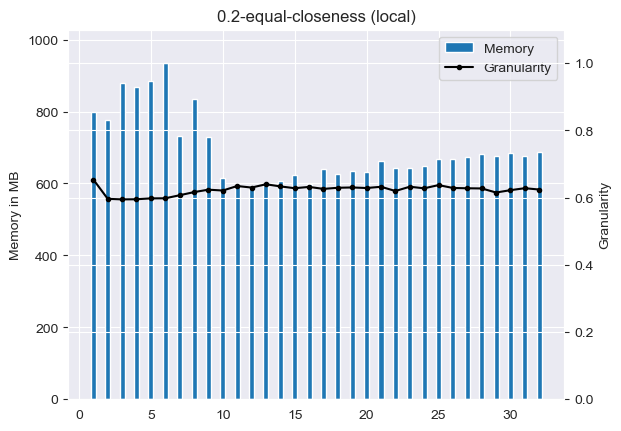

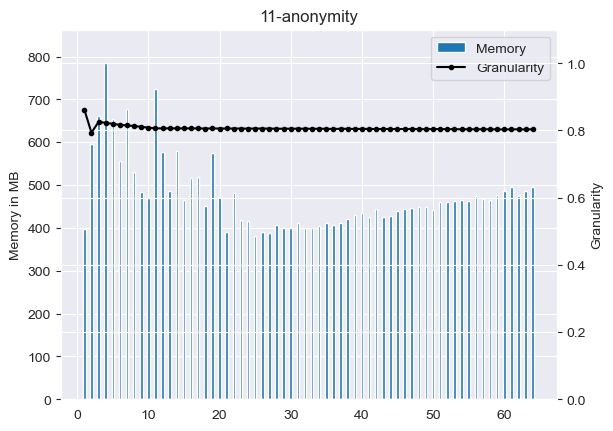

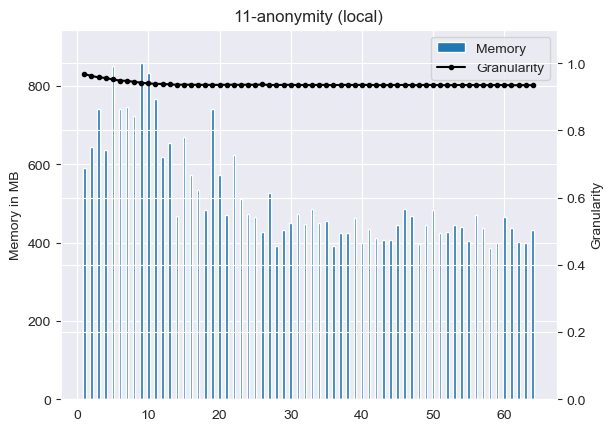

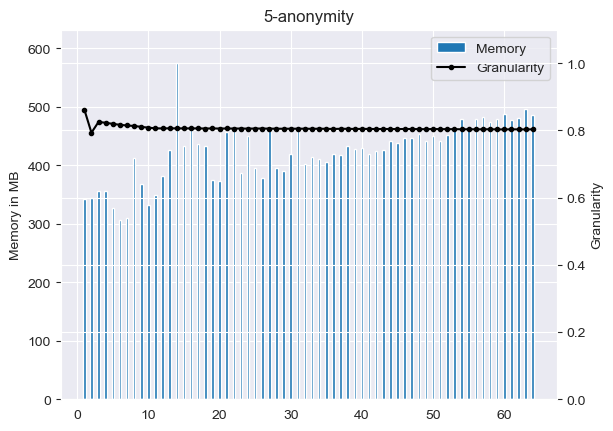

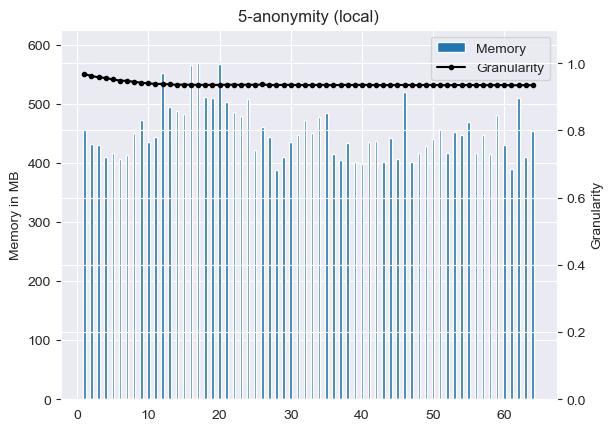

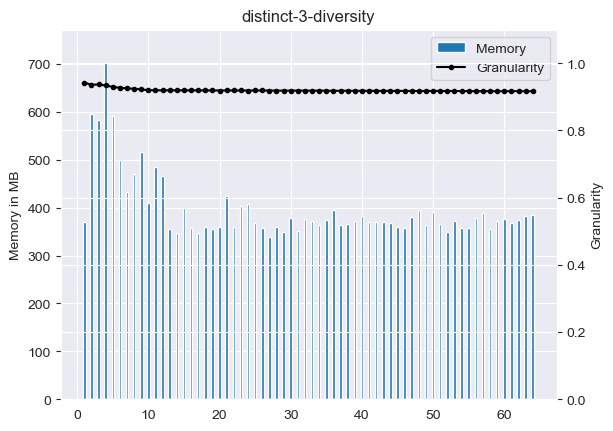

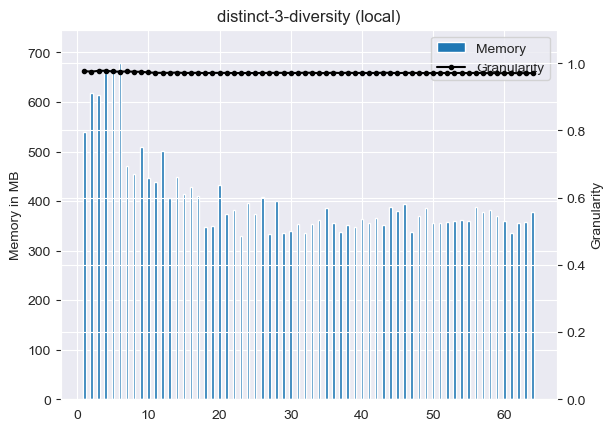

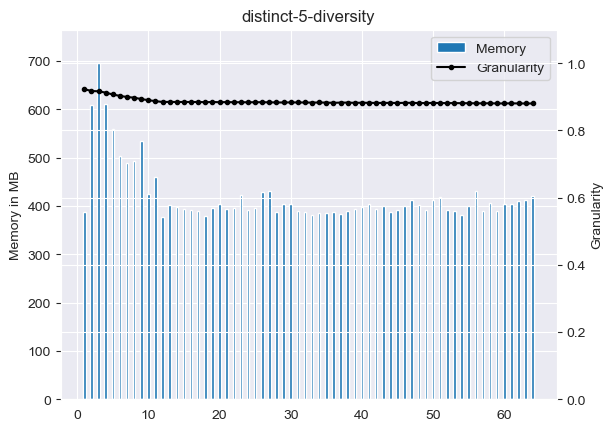

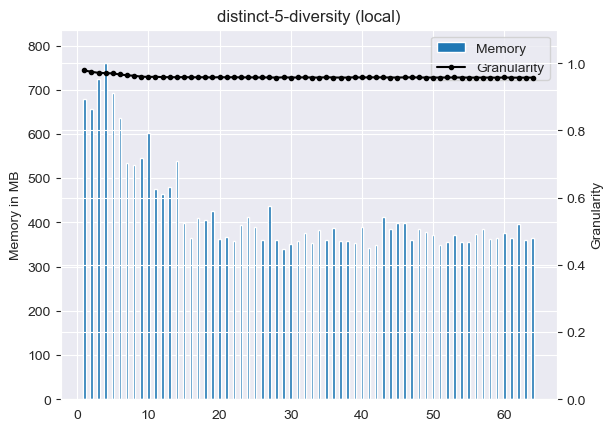

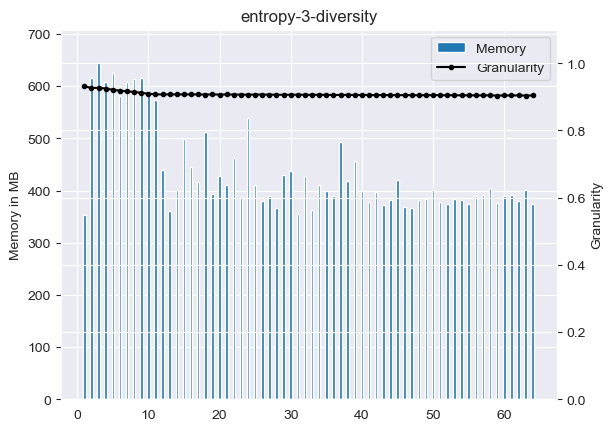

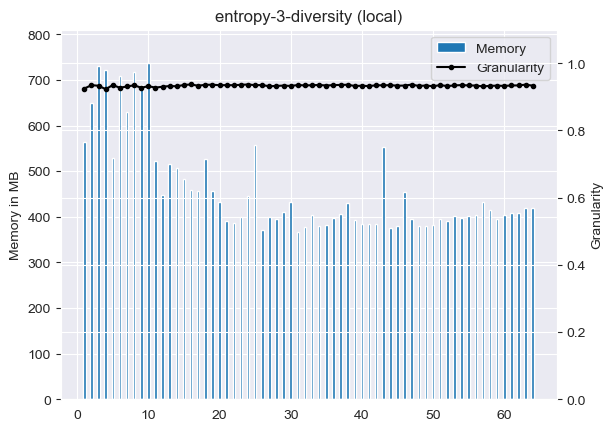

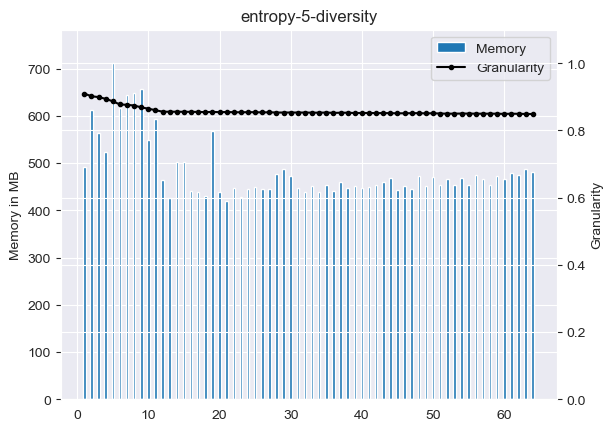

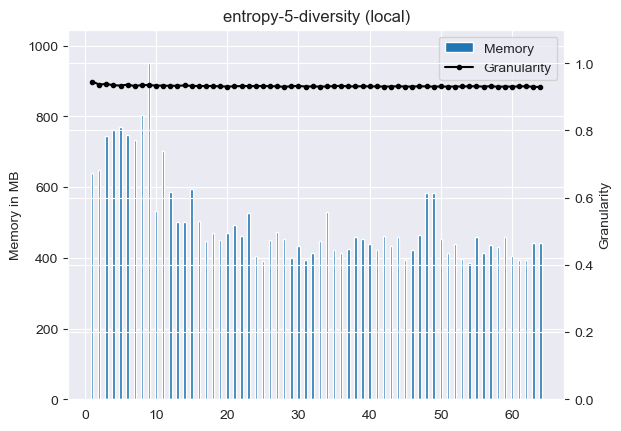

14


In [2]:
i = 0
for config in df.groupby('Config').last().reset_index()['Config']:
    for local in df.groupby('Local').last().reset_index()['Local']:
        threads = df.loc[df.Config == config]
        threads = threads.loc[df.Local == local]["Threads"]
        memory = df.loc[df.Config == config]
        memory = memory.loc[df.Local == local]["Memory"] / 1000000 # to get MB
        width = 0.35
        granularity = df.loc[df.Config == config]
        granularity = granularity.loc[df.Local == local]["Granularity"]
        if threads.size > 0:
            i = i + 1
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.set_ylim(0, memory.max() * 1.1)
            ax2.set_ylim(0, 1.1)
            ax1.bar(threads, memory, width=width, label="Memory")
            ax1.set_ylabel("Memory in MB")
            ax2.plot(threads, granularity, label="Granularity", color="k", marker=".")
            ax2.set_ylabel("Granularity")
            #ax1.legend(loc=1)
            #ax2.legend(loc=9)
            handles, labels = ax1.get_legend_handles_labels()
            handles2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(handles+handles2, labels+labels2)
            if local:
                ax1.set_title(config + " (local)")
            else:
                ax1.set_title(config)
            #plt.xticks(range(1,threads.size+1))
            plt.savefig("test.svg", format='svg')
            plt.savefig("test.png", format='png')
            plt.show()
print(i)

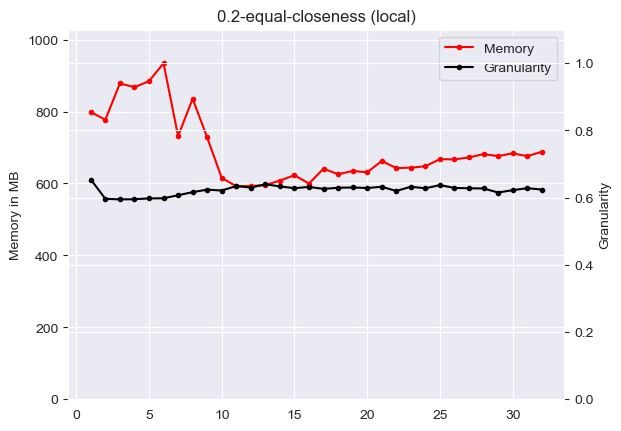

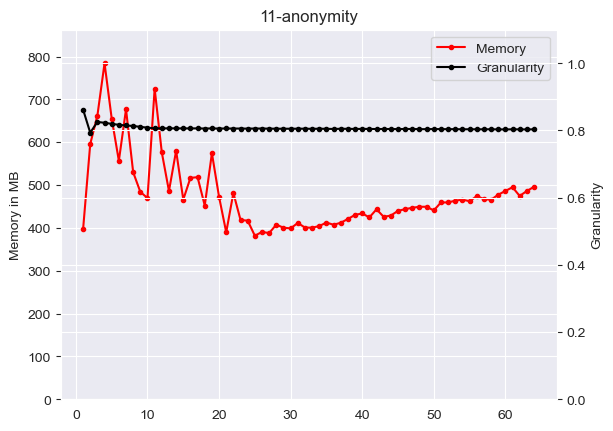

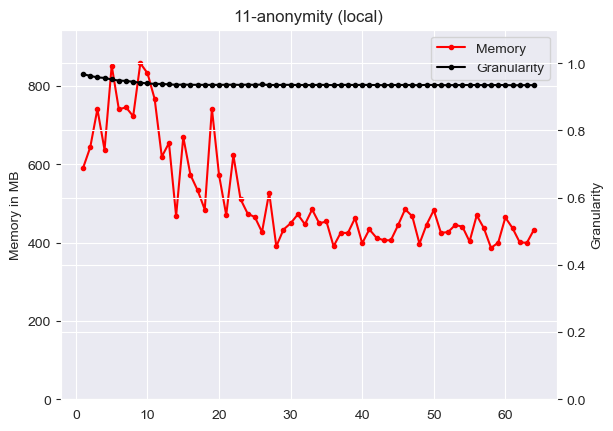

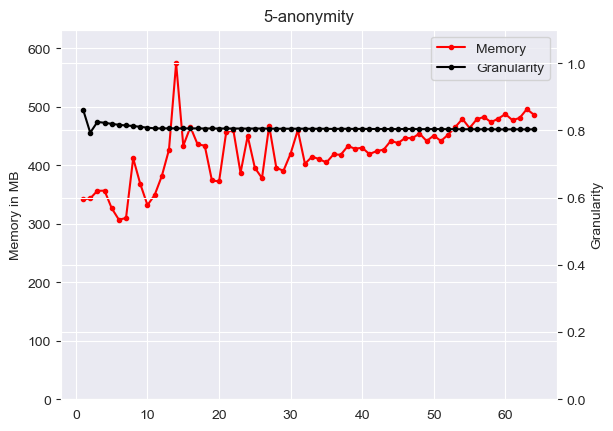

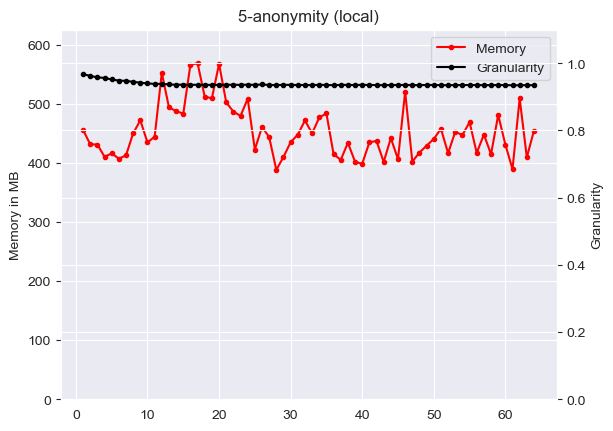

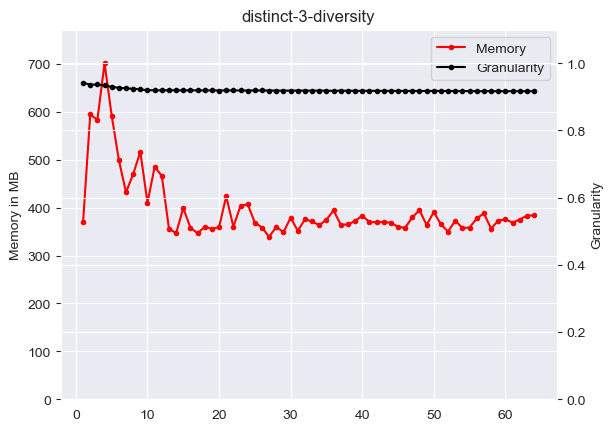

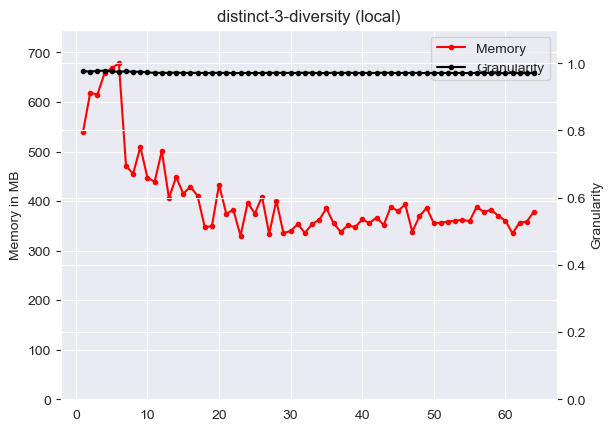

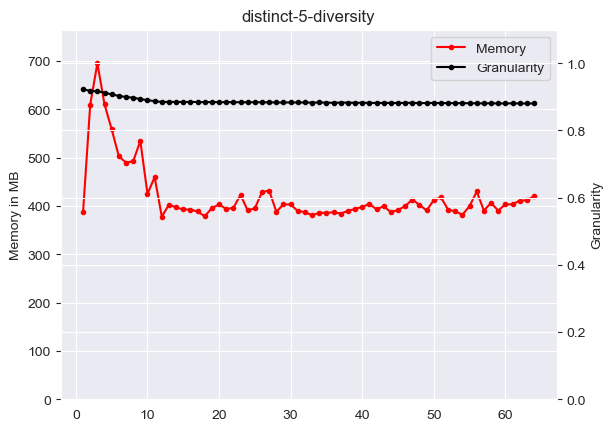

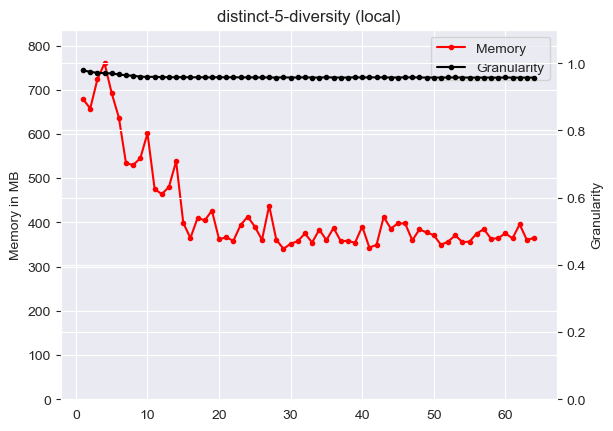

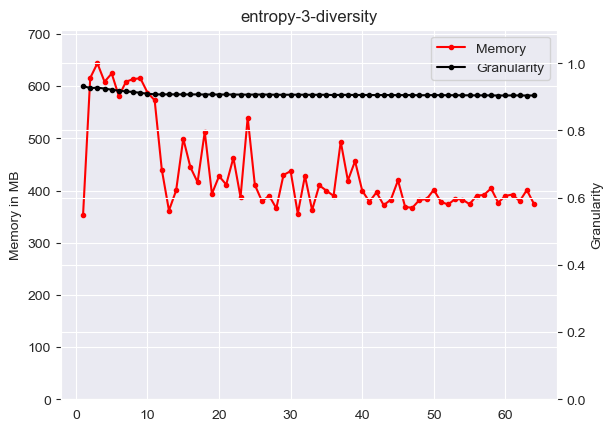

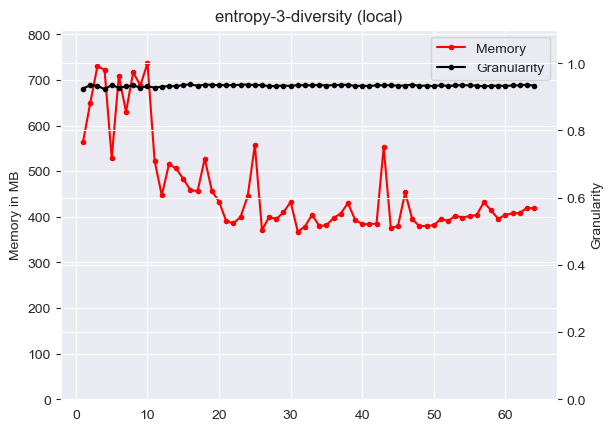

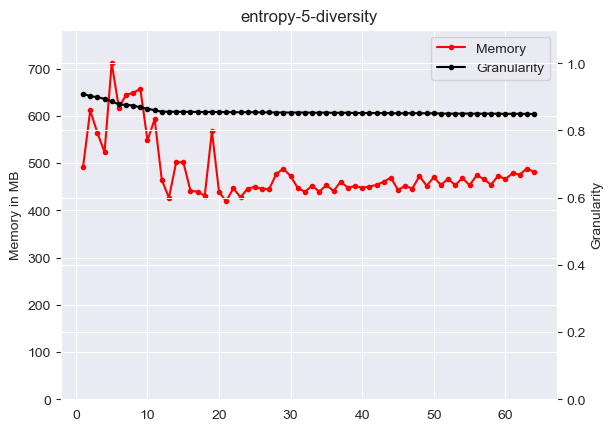

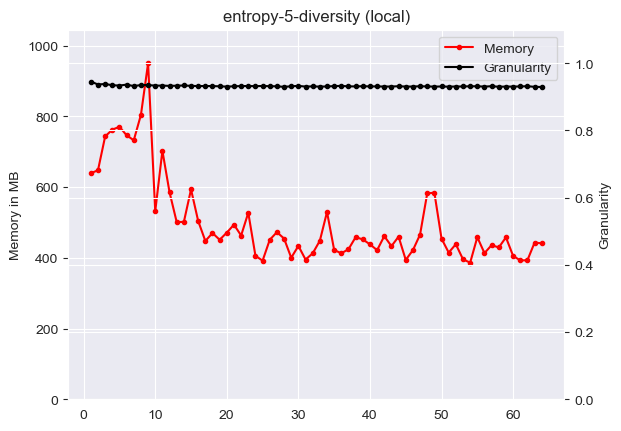

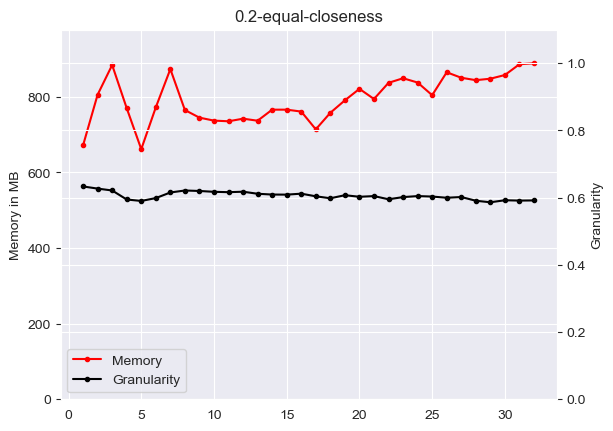

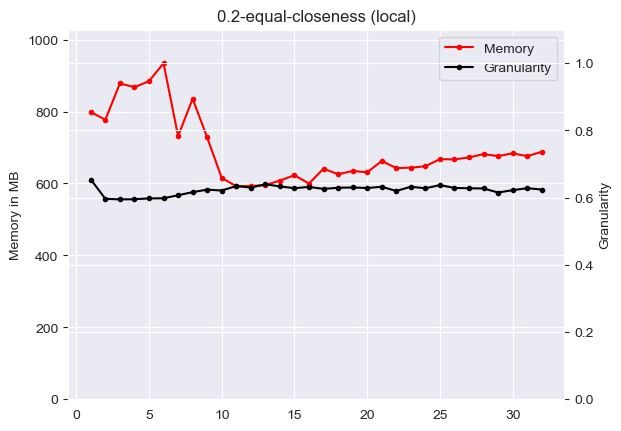

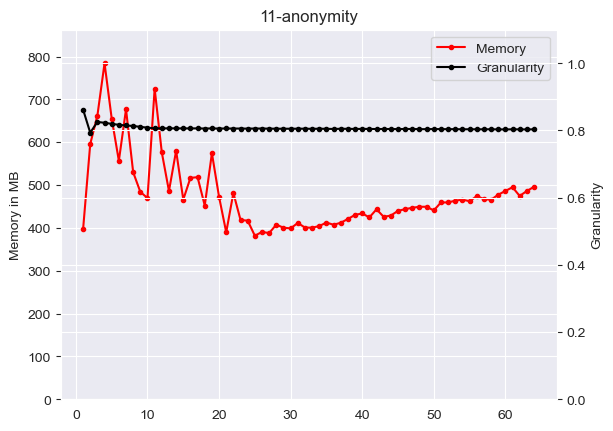

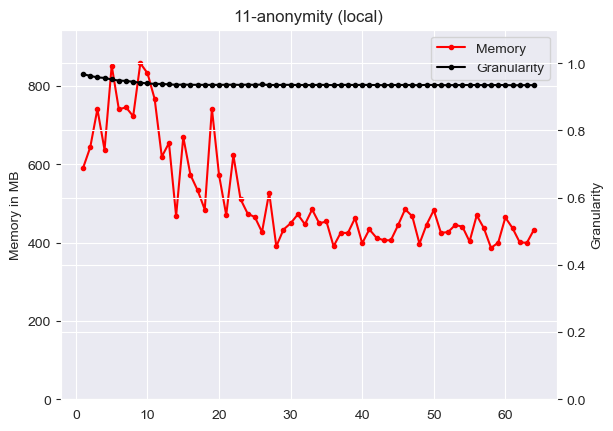

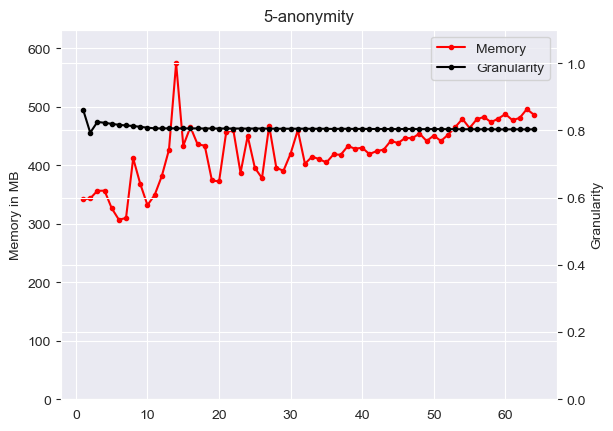

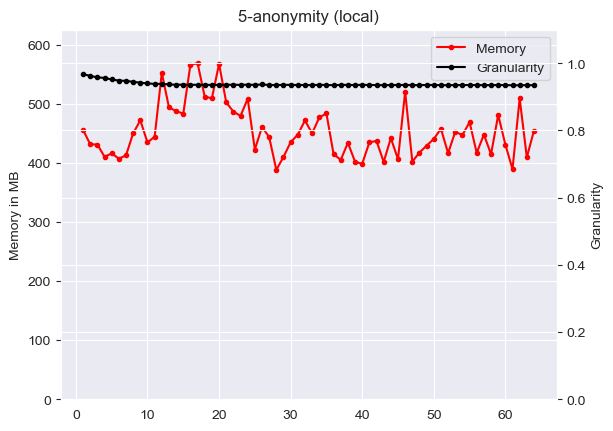

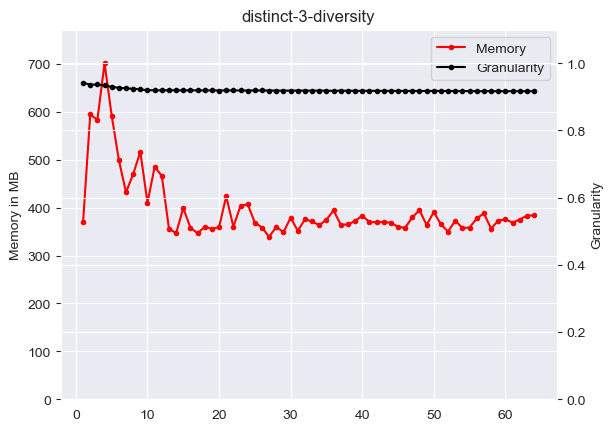

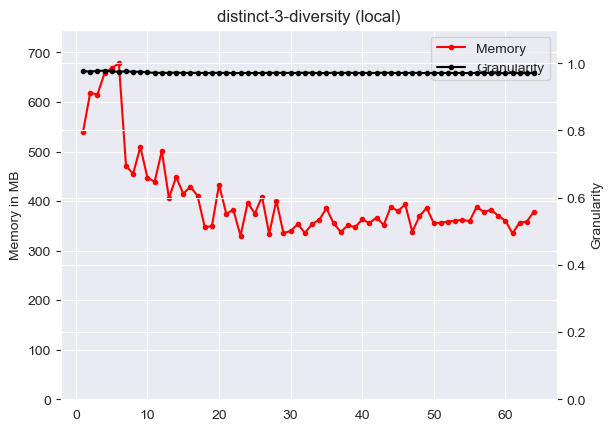

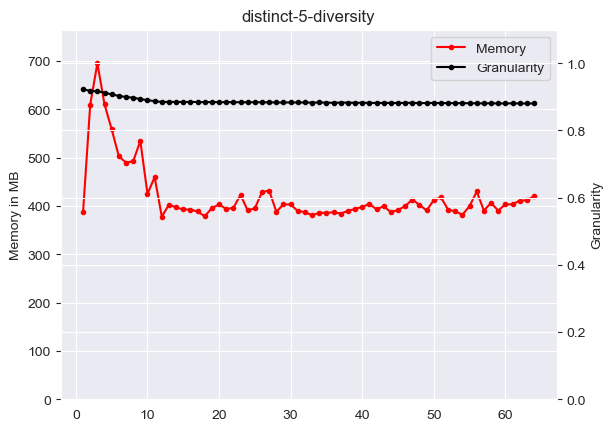

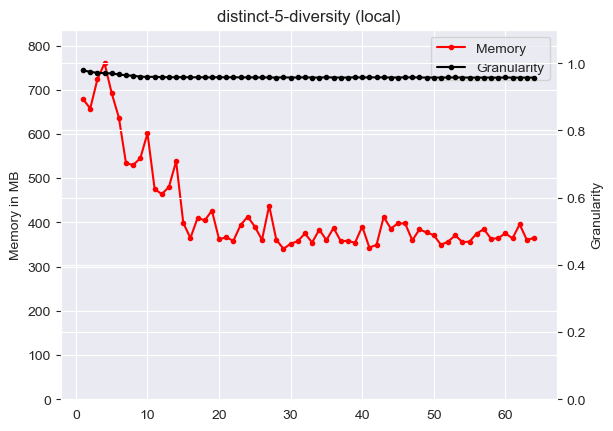

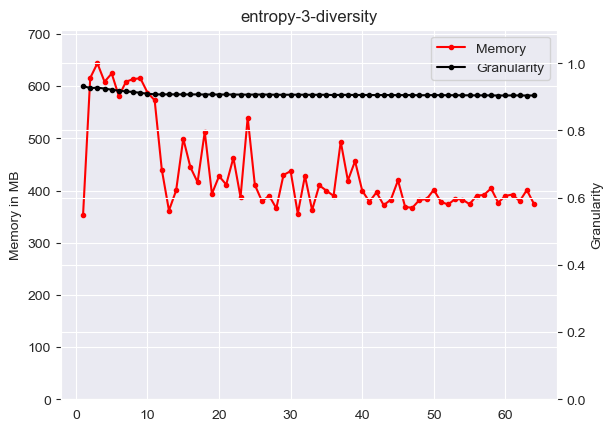

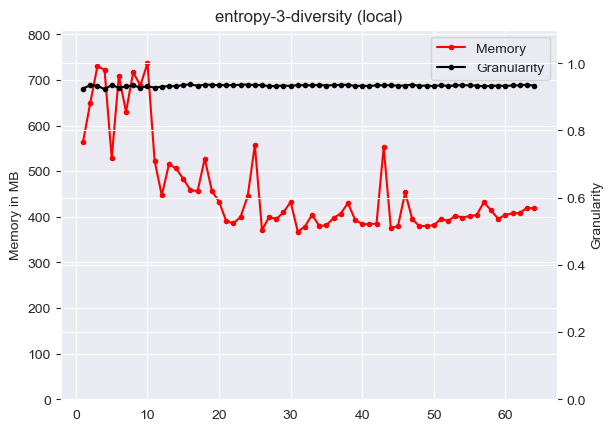

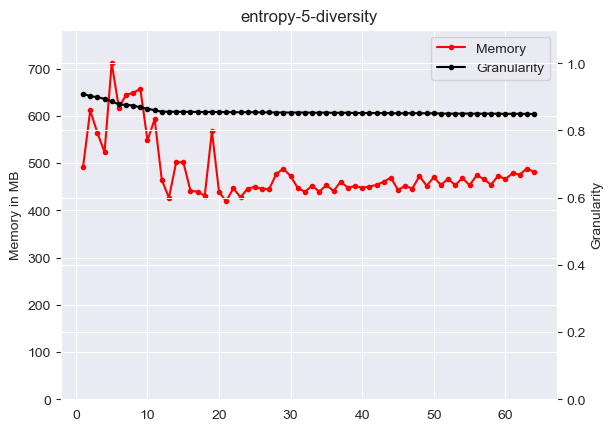

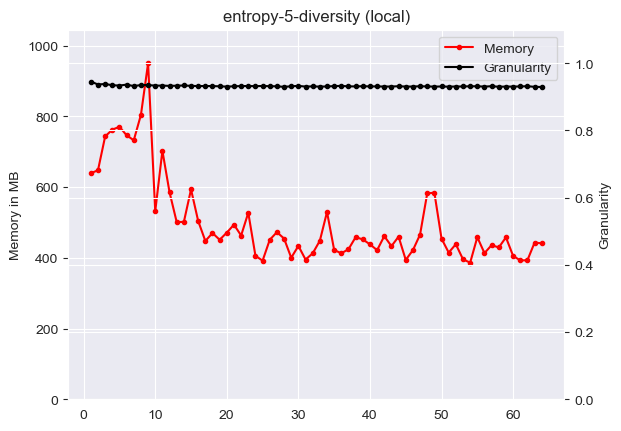

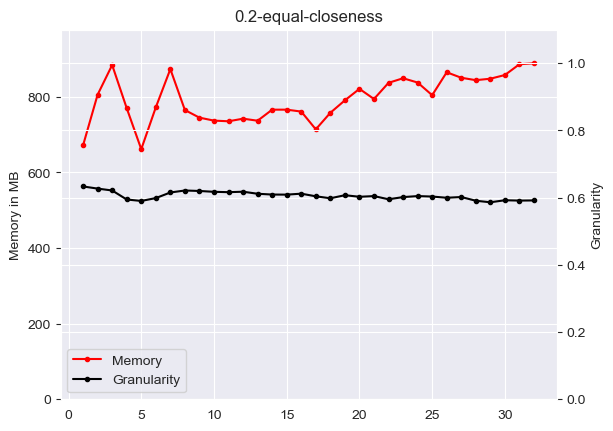

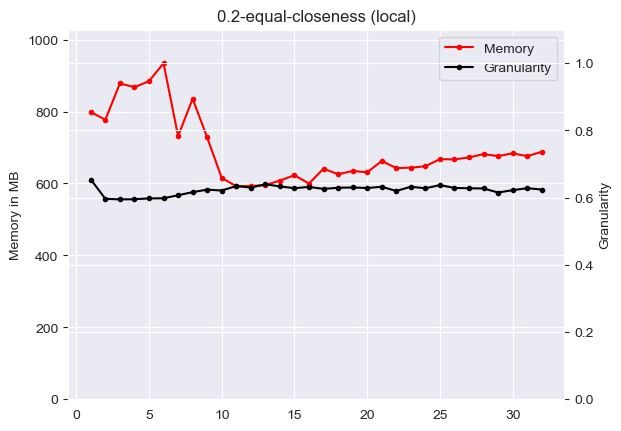

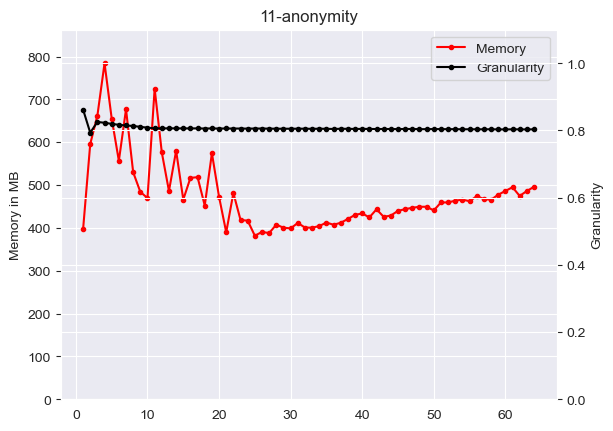

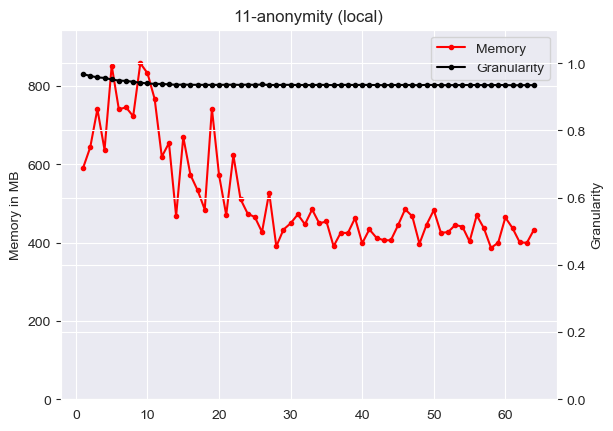

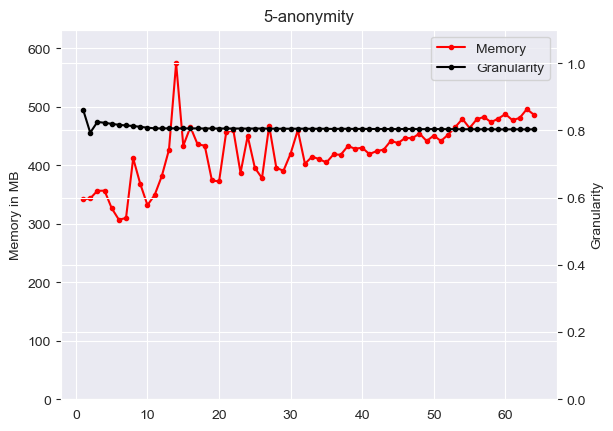

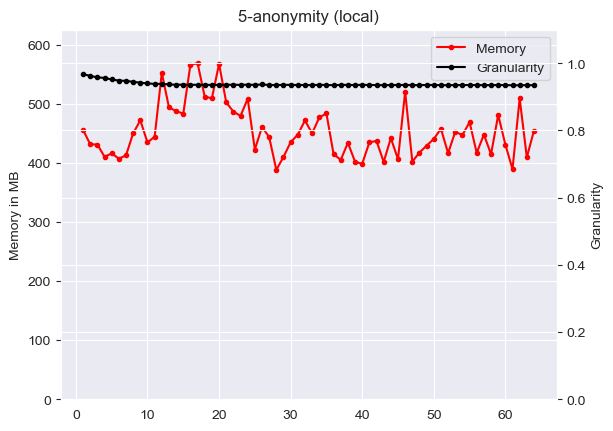

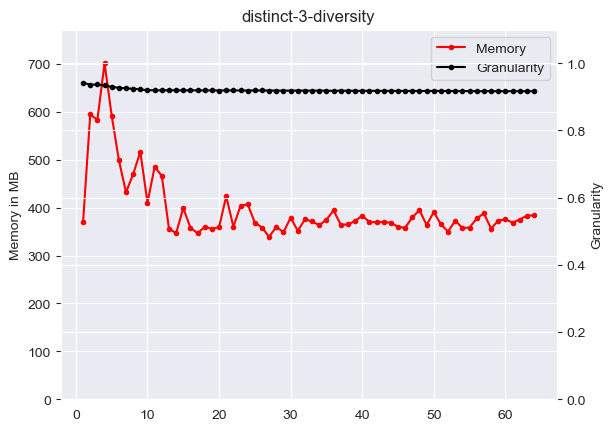

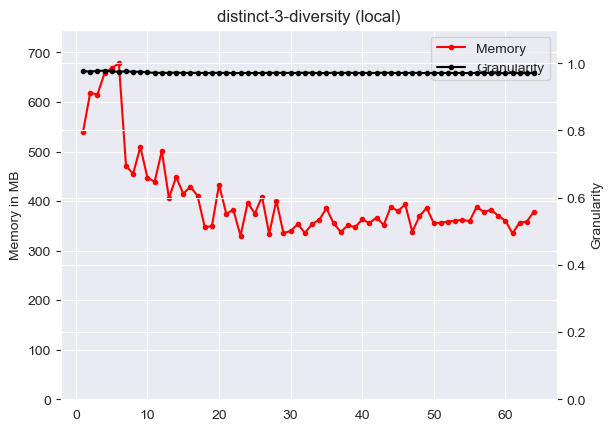

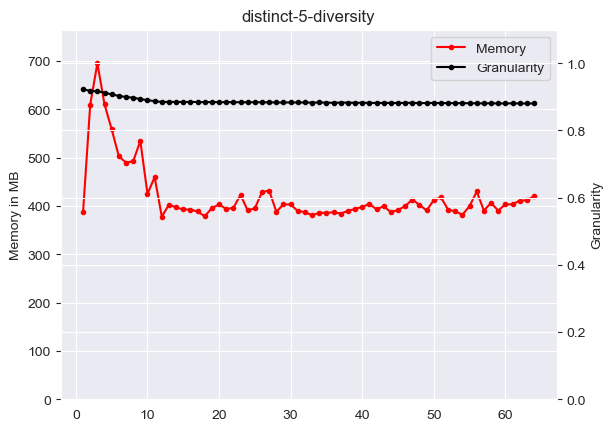

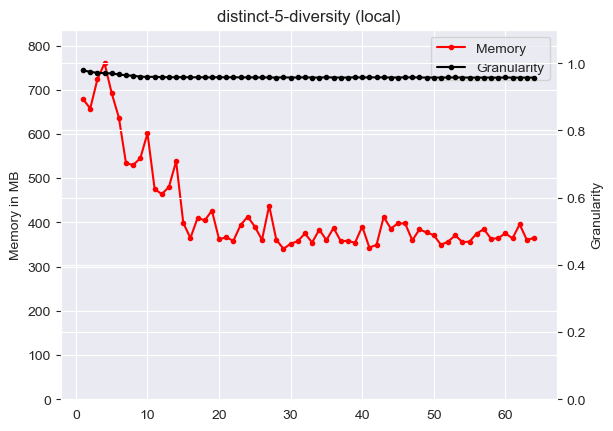

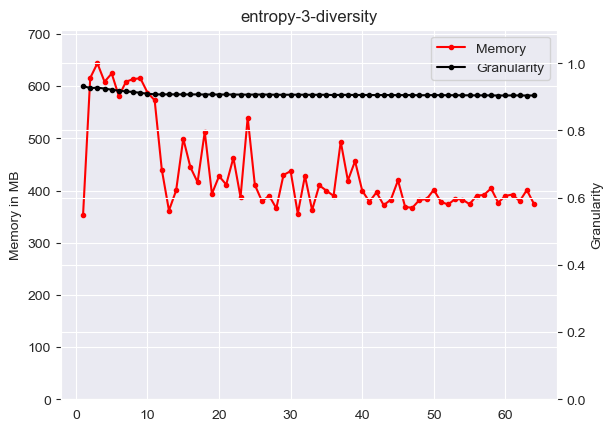

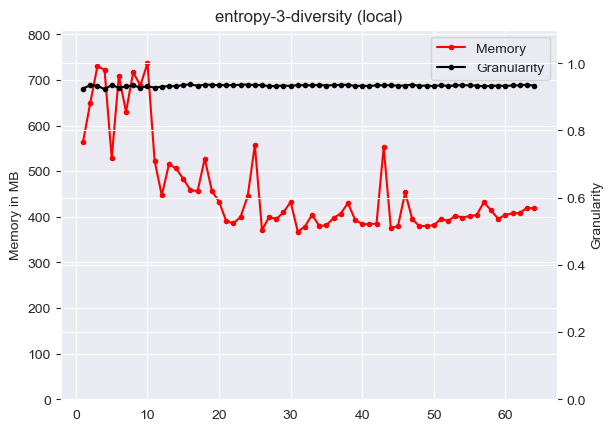

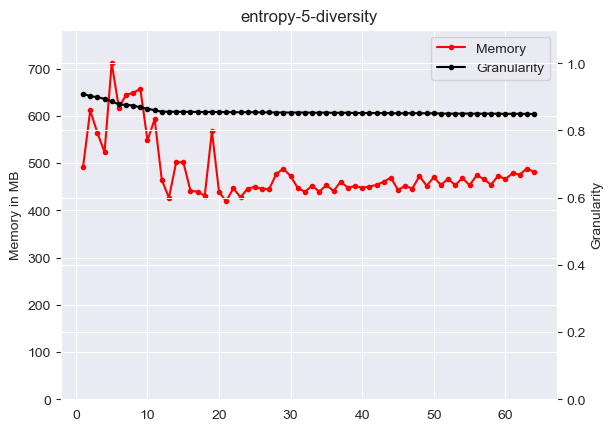

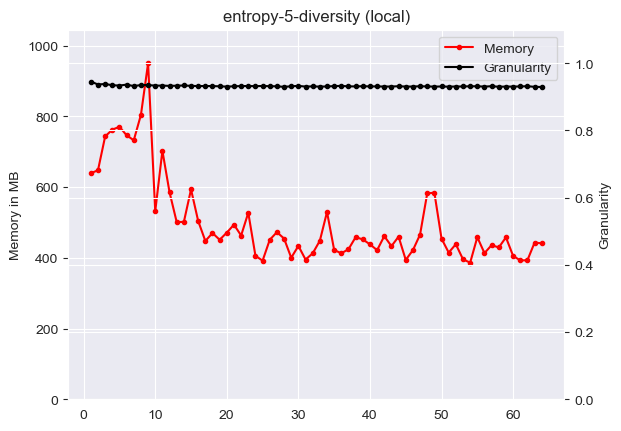

In [5]:
for config in df.groupby('Config').last().reset_index()['Config']:
    for local in df.groupby('Local').last().reset_index()['Local']:
        threads = df.loc[df.Config == config]
        threads = threads.loc[df.Local == local]["Threads"]
        memory = df.loc[df.Config == config]
        memory = memory.loc[df.Local == local]["Memory"] / 1000000 # to get MB
        width = 0.35
        granularity = df.loc[df.Config == config]
        granularity = granularity.loc[df.Local == local]["Granularity"]
        if threads.size > 0:
            fig, ax1 = plt.subplots()
            ax2 = ax1.twinx()
            ax1.set_ylim(0, memory.max() * 1.1)
            ax2.set_ylim(0, 1.1)
            ax1.plot(threads, memory, label="Memory", color="r", marker=".")
            ax1.set_ylabel("Memory in MB")
            ax2.plot(threads, granularity, label="Granularity", color="k", marker=".")
            ax2.set_ylabel("Granularity")
            #ax1.legend(loc=1)
            #ax2.legend(loc=9)
            handles, labels = ax1.get_legend_handles_labels()
            handles2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(handles+handles2, labels+labels2)
            if local:
                ax1.set_title(config + " (local)")
                plt.savefig("images/memory_" + config + "_local.svg", format='svg')
                plt.savefig("images/memory_" + config + "_local.png", format='png')
            else:
                ax1.set_title(config)
                plt.savefig("images/memory_" + config + ".svg", format='svg')
                plt.savefig("images/memory_" + config + ".png", format='png')
                #plt.xticks(range(1,threads.size+1))
            plt.show()


In [ ]:
for config in df.groupby('Config').last().reset_index()['Config']:
    for local in df.groupby('Local').last().reset_index()['Local']:
        threads = df.loc[df.Config == config]
        threads = threads.loc[df.Local == local]["Threads"]
        if threads.size > 0:
            if local:
                print(config + " (local)")
            else:
                print(config)


In [ ]:
s = "["
for config in df.groupby('Config').last().reset_index()['Config']:
    threads = df.loc[df.Config == config]
    threads = threads.loc[df.Local == False]["Threads"]
    if threads.size > 0 and not configs.__contains__(config):
            s = s + '\'' + config + '\','

print(s)

In [ ]:
# for which local exists
configs = ['0.01-average-risk','0.05-average-risk','0.2-equal-closeness','0.2-equal-closeness (global distribution)','0.5-equal-closeness','0.5-equal-closeness (global distribution)','1-disclosure-privacy','1-enhanced-likeness','1-enhanced-likeness (global distribution)','11-anonymity','2-disclosure-privacy','2-enhanced-likeness','2-enhanced-likeness (global distribution)','5-anonymity','distinct-3-diversity','distinct-5-diversity','entropy-3-diversity','entropy-5-diversity']

In [ ]:
configs_avg_risk = ['0.01-average-risk','0.05-average-risk']
configs_equal_closeness = ['0.2-equal-closeness','0.2-equal-closeness (global distribution)','0.5-equal-closeness','0.5-equal-closeness (global distribution)']
configs_disclosure = ['1-disclosure-privacy','2-disclosure-privacy']
configs_diversity = ['distinct-3-diversity','distinct-5-diversity','entropy-3-diversity','entropy-5-diversity']
configs_enhanced = ['1-enhanced-likeness','1-enhanced-likeness (global distribution)','2-enhanced-likeness','2-enhanced-likeness (global distribution)']
configs_k_anonymity = ['5-anonymity', '11-anonymity']
configs_dp = ['(e10-6, 1.0)-differential privacy','(e10-6, 2.0)-differential privacy','(e10-6, 3.0)-differential privacy','(e10-6, 4.0)-differential privacy','(e10-6, 5.0)-differential privacy']